In [ ]:
import os
import glob
from skimage import io,transform
import matplotlib.pyplot as plt
import numpy as np
path="V:\kaggle\dataset\honey bee\honey-bee-pollen\PollenDataset\images"
listdir=glob.glob(os.path.join(path,"*.jpg"))
def preprocess(imgpath):
    data=[]
    label=[]
    for i ,file in enumerate(imgpath):
       img=io.imread(file)
       img=transform.resize(img,(300,180))
       data.append(img)
       f=os.path.basename(file)
       
       if(os.path.splitext(f)[0][0]=="P"):
           label.append(1)
       else:
           label.append(0)

    return np.array(data),np.array(label)

x,y=preprocess(listdir)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.9,shuffle=True)
from keras import layers
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from keras import optimizers
model=models.Sequential()
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(300,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer=optimizers.Adam(),loss="binary_crossentropy",metrics=["acc"])
his=model.fit(xtrain,ytrain,epochs=50,batch_size=20)


In [8]:
model.evaluate(xtest,ytest)

72/72 [==============================] - 3s 46ms/step


[0.26116829448276097, 0.9305555555555556]

In [9]:
acc=his.history["acc"]

In [10]:
import matplotlib.pyplot as plt

In [11]:
epochs=list(range(len(acc)))

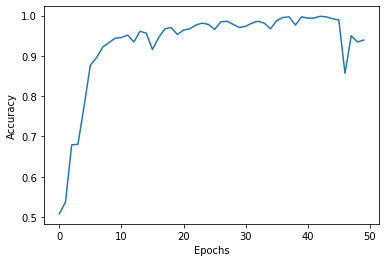

In [12]:
plt.plot(epochs,acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [13]:
model.save("Bee_Classification_model.h5")